# load libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# Load the dataset

In [ ]:
# URL of the Iris dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Display the first 5 rows to check the data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Display

In [ ]:
# Display the first 5 rows of the dataset
print(df.head())

# Display basic information about the dataset
print("\nDataset information:")
print(df.info())

# Display statistical summary of the dataset
print("\nDataset description:")
print(df.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Dataset description:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   1

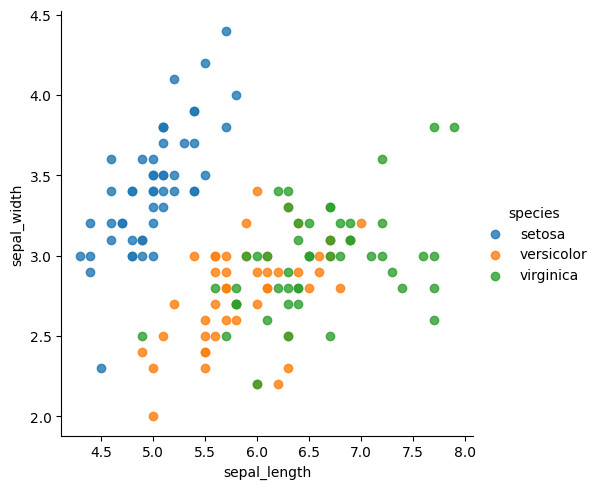

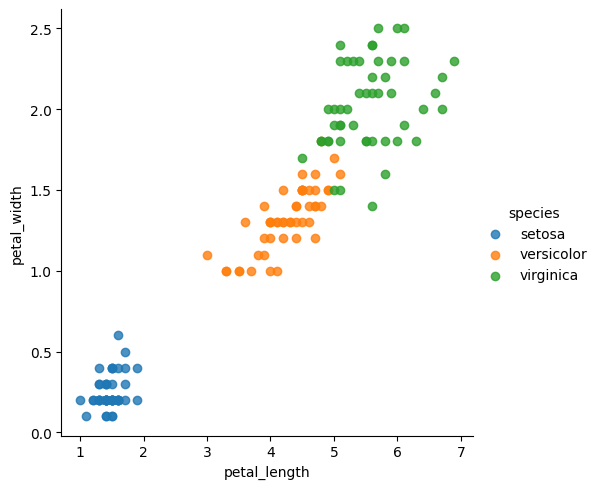

In [ ]:
# Data Visualization
sns.lmplot(data=df, x="sepal_length", y="sepal_width", hue="species", fit_reg=False)
sns.lmplot(data=df, x="petal_length", y="petal_width", hue="species", fit_reg=False)
plt.show()

# Prepare features and labels

In [ ]:
X = df.iloc[:, :-1].values  # Feature matrix
y = df.iloc[:, -1].values   # Labels

# Encode labels into numerical values
classes = {species: i for i, species in enumerate(np.unique(y))}
y = np.array([classes[label] for label in y])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Distance Functions
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2):
  return np.sum(np.abs(x1 - x2))

def cosine_distance(x1, x2):
    return 1 - (np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2)))

In [ ]:
# KNN Classifier Implementation
class KNNClassifier:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        self.distance_func = {'euclidean': euclidean_distance, 'manhattan': manhattan_distance, 'cosine': cosine_distance}[distance_metric]

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train

    def predict(self, X_test):
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        distances = np.array([self.distance_func(x, x_train) for x_train in self.X_train])
        k_indices = distances.argsort()[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        return Counter(k_nearest_labels).most_common(1)[0][0]

# Run KNN and Evaluate Performance

In [ ]:
for metric in ['euclidean', 'manhattan', 'cosine']:
    knn = KNNClassifier(k=5, distance_metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    correct, wrong = np.sum(y_pred == y_test), len(y_test) - np.sum(y_pred == y_test)

    print(f"Metric: {metric}\nAccuracy: {accuracy * 100:.2f}%\nCorrect Predictions: {correct}\nWrong Predictions: {wrong}\n")

Metric: euclidean
Accuracy: 96.67%
Correct Predictions: 29
Wrong Predictions: 1

Metric: manhattan
Accuracy: 93.33%
Correct Predictions: 28
Wrong Predictions: 2

Metric: cosine
Accuracy: 96.67%
Correct Predictions: 29
Wrong Predictions: 1



# Experiment with different values of k

In [ ]:
k_values = [1, 3, 5, 7, 9]
print("\nExperimenting with different values of k:")
for k in k_values:
    knn = KNNClassifier(k=k, distance_metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"k={k}: Accuracy={accuracy * 100:.2f}%")


Experimenting with different values of k:
k=1: Accuracy=90.00%
k=3: Accuracy=93.33%
k=5: Accuracy=96.67%
k=7: Accuracy=96.67%
k=9: Accuracy=96.67%
